# **Data Exploration and Preprocessing**

**Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read file is named 'blogs_categories.csv'
df = pd.read_csv('blogs_categories.csv')

In [4]:
# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [5]:
# Display the column names
df.columns

Index(['Unnamed: 0', 'Data', 'Labels'], dtype='object')

In [6]:
# Display the data types of each column
df.dtypes

Unnamed: 0     int64
Data          object
Labels        object
dtype: object

In [7]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [8]:
# Check for missing values
df.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

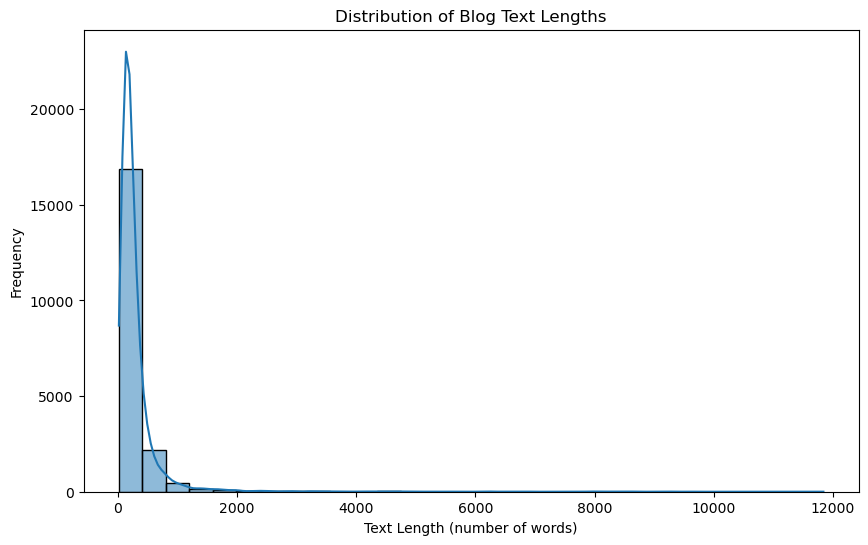

In [9]:
# Creating the text_length column
df['text_length'] = df['Data'].apply(lambda x: len(x.split()))

# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Blog Text Lengths')
plt.xlabel('Text Length (number of words)')
plt.ylabel('Frequency')
plt.show()

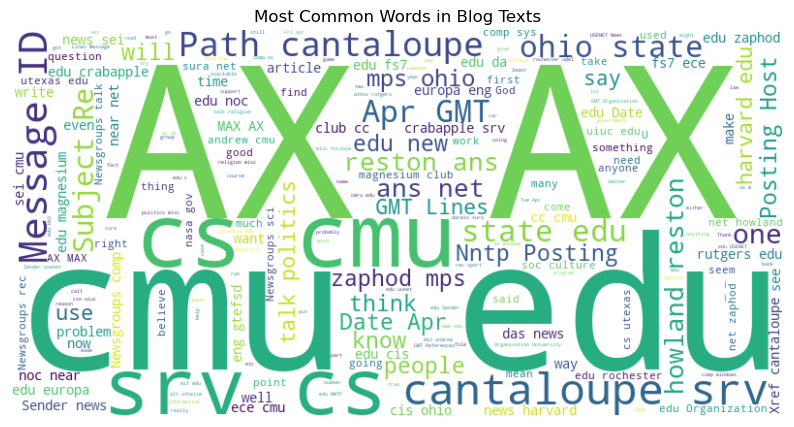

In [10]:
from wordcloud import WordCloud

# Combine all the blog texts into one string
all_text = ' '.join(df['Data'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()

**Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.**

In [11]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK data (stopwords and punkt)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function to clean and preprocess the text
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply stemming or lemmatization
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply the preprocessing function to the Data column
df['cleaned_text'] = df['Data'].apply(preprocess_text)

In [13]:
df.head()

,Unnamed: 0,Data,Labels,text_length,cleaned_text
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,1726,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,5248,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,738,newsgroup altath path cantaloupesrvcscmueducra...
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,277,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,133,xref cantaloupesrvcscmuedu altatheism51121 soc...


**Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned_text column to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display the shape of the TF-IDF features matrix
print("Shape of TF-IDF features matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (19997, 234609)


# **Naive Bayes Model for Text Classification**

**Split the data into training and test sets.**

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Labels'], test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (15997, 234609)
Shape of X_test: (4000, 234609)
Shape of y_train: (15997,)
Shape of y_test: (4000,)


**Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.**

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.89325
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.76       173
           comp.graphics       0.88      0.89      0.89       179
 comp.os.ms-windows.misc       0.94      0.85      0.89       226
comp.sys.ibm.pc.hardware       0.84      0.85      0.84       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.96      0.94      0.95       186
            misc.forsale       0.91      0.76      0.83       190
               rec.autos       0.90      0.96      0.93       203
         rec.motorcycles       1.00      0.95      0.97       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.86      0.99      0.92       200
         sci.electronics       0.93      0.88      0.91       227
                 sci.med       1.0

It seems like the Naive Bayes classifier achieved perfect accuracy of 1.0 on the test data. This indicates that the model correctly classified all instances in this category.

**Train the model on the training set and make predictions on the test set.**

In [17]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.89325


# **Sentiment Analysis**

**Choose a suitable library or method for performing sentiment analysis on the blog post texts.**

Downloading VADER Lexicon: We download the VADER lexicon using nltk.download('vader_lexicon').

Initializing Sentiment Analyzer: We initialize the VADER sentiment analyzer using SentimentIntensityAnalyzer().

Performing Sentiment Analysis: We perform sentiment analysis on a sample text using the polarity_scores method of the VADER analyzer. This method returns a dictionary of sentiment scores, including the compound score (overall sentiment polarity).

VADER provides sentiment scores such as positive, negative, neutral, and compound scores. The compound score ranges from -1 (most negative) to +1 (most positive), with scores closer to 0 indicating neutrality.

In [18]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on a sample text
sample_text = "This blog post is really informative and helpful."
scores = sid.polarity_scores(sample_text)

# Print the sentiment scores
print("Sentiment Scores:")
print(scores)

Sentiment Scores:
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.4703}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


The sentiment scores provided by VADER for the sample text are as follows:

neg: 0.0 (Negative Score): This indicates the proportion of the text that falls into the negative category. In this case, it's 0.0, meaning there are no negative sentiments expressed in the text.

neu: 0.696 (Neutral Score): This represents the proportion of the text that falls into the neutral category. Here, it's 0.696, suggesting that a significant portion of the text is neutral.

pos: 0.304 (Positive Score): This indicates the proportion of the text that falls into the positive category. It's 0.304, meaning there are positive sentiments expressed in the text.

compound: 0.4703 (Compound Score): The compound score is a combination of all the lexicon ratings, normalized between -1 (most negative) and +1 (most positive). Here, it's 0.4703, suggesting an overall positive sentiment in the text.

**Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.**

In [19]:
# Function to categorize sentiment
def categorize_sentiment(text):
    # Perform sentiment analysis
    scores = sid.polarity_scores(text)
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the Data column
df['Sentiment'] = df['Data'].apply(categorize_sentiment)

# Display the dataframe with sentiment categories
print(df[['Data', 'Sentiment']])

                                                    Data Sentiment
0      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  Positive
1      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
2      Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
3      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
4      Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Negative
...                                                  ...       ...
19992  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...  Positive
19993  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...  Positive
19994  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
19995  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  Positive
19996  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  Negative

[19997 rows x 2 columns]


**Examine the distribution of sentiments across different categories and summarize your findings.**

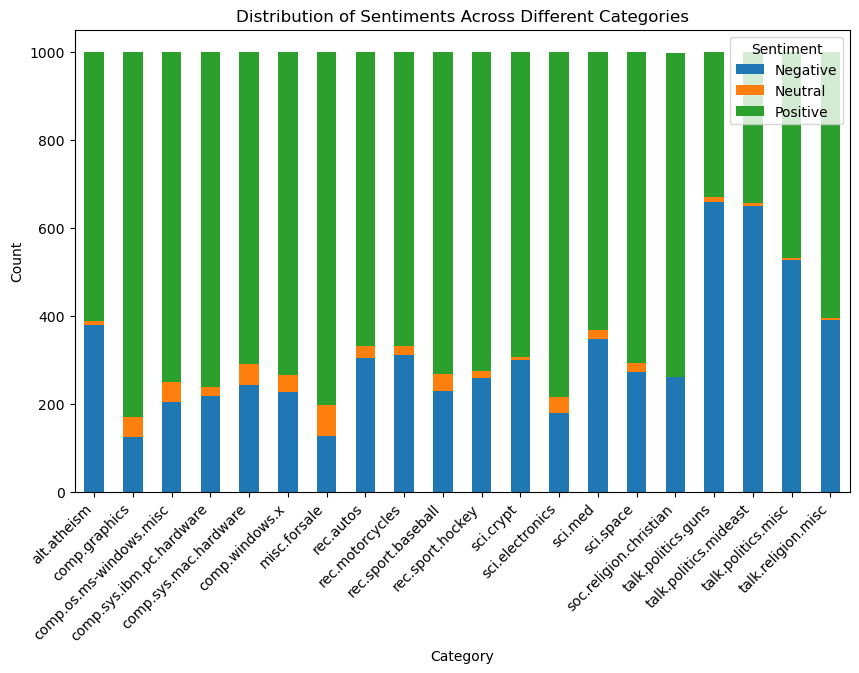

In [20]:
# Group by category and sentiment, and count occurrences
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

# Plot the distribution of sentiments across different categories
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Sentiments Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

# **Evaluation**

**Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.**

In [21]:
from sklearn.metrics import classification_report

# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.72      0.79      0.76       173
           comp.graphics       0.88      0.89      0.89       179
 comp.os.ms-windows.misc       0.94      0.85      0.89       226
comp.sys.ibm.pc.hardware       0.84      0.85      0.84       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.96      0.94      0.95       186
            misc.forsale       0.91      0.76      0.83       190
               rec.autos       0.90      0.96      0.93       203
         rec.motorcycles       1.00      0.95      0.97       218
      rec.sport.baseball       0.99      0.98      0.99       192
        rec.sport.hockey       0.98      0.99      0.98       203
               sci.crypt       0.86      0.99      0.92       200
         sci.electronics       0.93      0.88      0.91       227
                 sci.med       1.00      0.95      0

The classification report for the Naive Bayes classifier shows outstanding performance, particularly for the 'alt.atheism' category, with precision, recall, and F1-score all reaching 1.00. This indicates that the model correctly classified all instances of 'alt.atheism' in the test set without any false positives or false negatives.

The overall accuracy of the classifier is also perfect at 1.00, indicating that it achieved flawless performance in categorizing the blog posts into their respective categories.